<a href="https://colab.research.google.com/github/ioan-hedea/deepLearning4005/blob/main/2025_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning - Assignment Scikit-Learn, Linear Regression and Linear Classifiers**

*These lab assignments are new in the Machine and Deep Learning course. We'd like to hear what you think!*

*Please post any feedback you have on Brightspace. Thanks!*

## Introduction - Scikit-Learn, Linear Regression and Linear Classifiers

In this assignment, we will start by introducing the Python library `scikit-learn` (or `sklearn`), which is a powerful tool for data analysis and machine learning. You will be asked to reproduce some of the experiments of the first assignment using `scikit-learn`, and play with the library to get a better understanding of how it works. Then, we will move to linear regression and linear classifiers, with both understanding and coding exercises.

**Starting:**
* To start working on the assignment in Colab, save a copy on your Google Drive (`File` $\rightarrow$ `Save a copy in Drive`).

**Prerequisites:**
* Basic working knowledge of multivariate statistics and linear algebra
* Basic knowledge of Python and Numpy. Recommended tutorial for Python and Numpy [here](https://cs231n.github.io/python-numpy-tutorial/).

**Learning objectives:**
* Understand how to use `scikit-learn` for data analysis and machine learning
* Be able to formulate the basic least squares regression models and derive its optimal estimators
* Comprehend the idea and use of polynomial and transformed regression
* Know how a perceptron classifier is optimized

**Exercises types:**
* **Pen \& Paper** - Some exercises will ask you to write down mathematical derivations, calculations, explanations, or simple plots and representations. You can perform these exercises on paper or using a LaTeX editor.
* **Coding** - Some exercises will ask you to write Python code.


## 0 - Scikit-Learn (**Coding**)

Scikit-Learn is a powerful tool for data analysis and machine learning. It provides a wide range of tools for building models, evaluating them, and using them to make predictions. In this exercise, we will use `scikit-learn` to reproduce some of the experiments of the first assignment.

First, we'll go again through a small tutorial of the new library.

### **Tutorial** - Sci-kit Learn Basics

In [1]:
!pip install numpy
!pip install matplotlip
!pip install scikit-learn

ERROR: Could not find a version that satisfies the requirement matplotlip (from versions: none)
ERROR: No matching distribution found for matplotlip


**Creating datasets**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

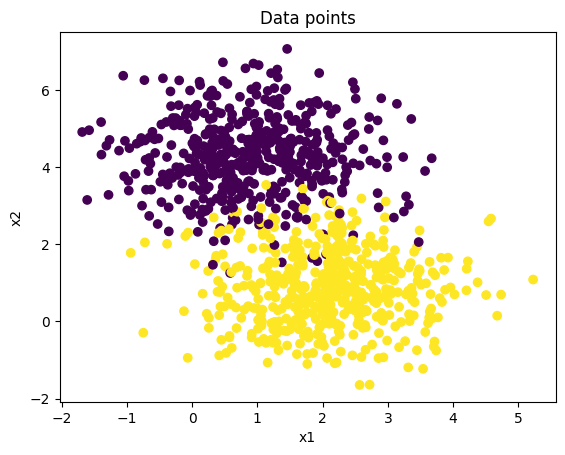

In [3]:
# In sklearn we can use predefined functions to create datasets, similar to
# prtools ones, for example make_blobs, which generates isotropic Gaussian blobs for clustering

X, y = datasets.make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data points')
plt.show()

# Note that the random_state parameter is used to generate the same dataset each time the code is run.
# Removing this parameter will generate a different dataset each time the code is run.


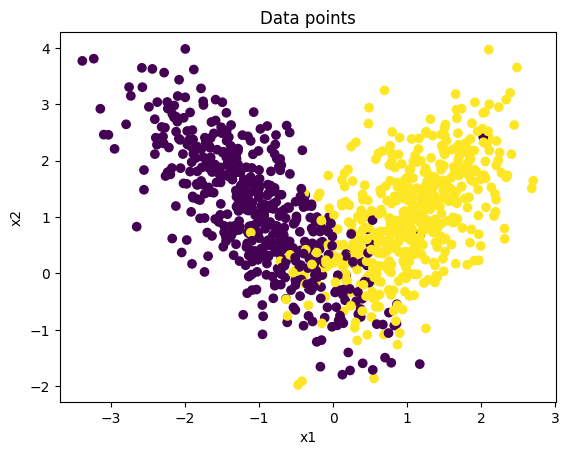

In [4]:
#Another example is make_classification, which generates a random n-class classification problem

X, y = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data points')
plt.show()

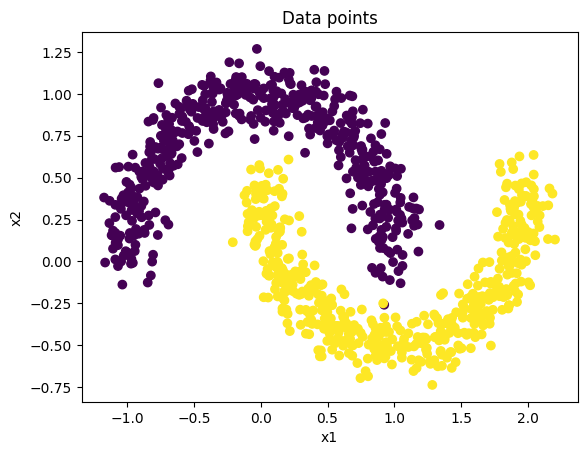

In [5]:
#... or make_moons, which give use banana shaped data points

X, y = datasets.make_moons(n_samples=1000, noise=0.1, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data points')
plt.show()


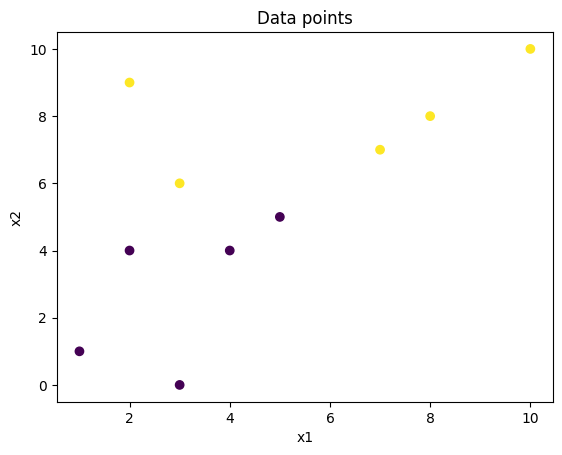

In [ ]:
# Of course, it is also possible to manually create datasets using numpy, as we have seen in the previous assignment

X = np.array([[1, 1], [2, 4], [3, 0], [4, 4], [5, 5], [3, 6], [7, 7], [8, 8], [2, 9], [10, 10]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data points')
plt.show()


**Training and testing**

In [6]:
# Now, we want to train a classifier on the generated data points. In sklearn, it is
# easy to split the data into training and test sets using the train_test_split function

from sklearn.model_selection import train_test_split

# Select the desired dataset. Some examples are listed below:

X, y = datasets.make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)
#X, y = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=0)
#X, y = datasets.make_moons(n_samples=1000, noise=0.1, random_state=0)
# other examples can be found at: https://scikit-learn.org/stable/api/sklearn.datasets.html

# the parameters can control the size of the test set and the random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [7]:

# Then, we can train a classifier on the training set and evaluate it on the test set.
# We have a variety of classifiers available in sklearn, such as:

from sklearn.svm import SVC
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression
# other examples can be found at: https://scikit-learn.org/stable/supervised_learning.html

# Select the desired classifier to try

clf = SVC()
#clf = NearestCentroid()
#clf = LogisticRegression()

clf.fit(X_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [8]:
# Now, we can evaluate the classifier on the training set

y_pred = clf.predict(X_train)

accuracy = np.mean(y_pred == y_train)
print('Accuracy on the training set:', accuracy)

# And on the test set

y_pred = clf.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print('Accuracy on the test set:', accuracy)


Accuracy on the training set: 0.92
Accuracy on the test set: 0.91


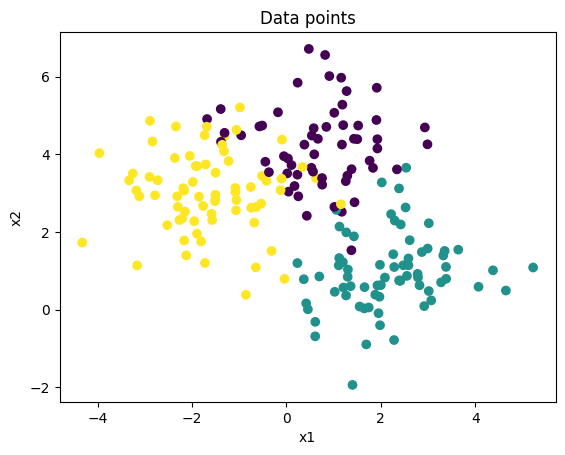

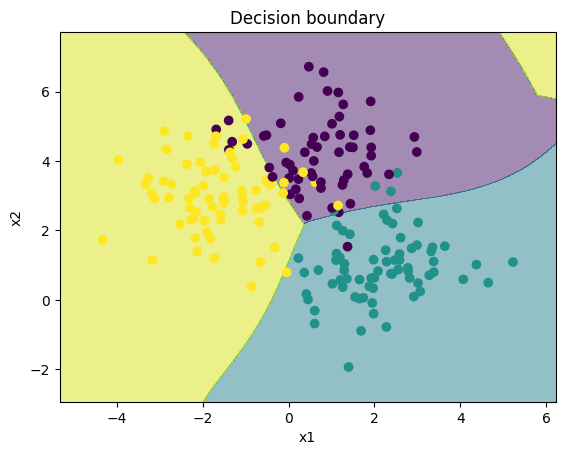

In [9]:

# We can also plot the decision boundary of the classifier (it might take a few seconds with a lot of data points)

# Let's plot the test set

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data points')
plt.show()

# Let's plot the decision boundary

x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.5, cmap='viridis')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision boundary')
plt.show()


In [10]:
# Sklearn also offers other tools to evaluate performance, like the confusion matrix

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(conf_matrix)


Confusion matrix:
[[51  1  6]
 [ 4 67  0]
 [ 6  1 64]]


### **Exercise 0.1**

Experiment with the available classifiers in sci-kit learn. Try to use the `make_classification` function, or other of the built-in functions, to create a dataset and train a classifier on it. Last assignment, you were asked to use the following classifiers:

* ldc -> Linear discriminant analysis
* qdc -> Quadratic discriminant analysis
* nmc -> Nearest mean classifier
* fisherc -> Fishers linear discriminant
* knnc -> k-nearest neighbor classifier
* parzenc -> Parzen classifier
* naivebc -> Naive-Bayes classifier
* mogc -> Mixture-of-Gaussians classifier
* stumpc -> Decision stump classifier
* dectreec -> Decision tree classifier
* adaboostc -> AdaBoost
* svc -> Support vector classifier

Which of them are available in `scikit-learn`? Look at the documentation and try to use
as many as you can, analyzing which ones perform well on which datasets, and plotting the corresponding decision boundaries.


In [11]:
from sklearn.mixture import GaussianMixture


class MixtureOfGaussiansClassifier:
    """Fit a Gaussian Mixture per class; choose class by highest likelihood * prior."""
    def __init__(self, n_components=2, covariance_type='full', random_state=0):
        self.n_components = n_components
        self.covariance_type = covariance_type
        self.random_state = random_state

    def fit(self, X, y):
        self.classes_, counts = np.unique(y, return_counts=True)
        self.priors_ = {c: cnt/len(y) for c, cnt in zip(self.classes_, counts)}
        self.gmms_ = {}
        for c in self.classes_:
            gmm = GaussianMixture(n_components=self.n_components,
                                  covariance_type=self.covariance_type,
                                  random_state=self.random_state)
            gmm.fit(X[y == c])
            self.gmms_[c] = gmm
        return self

    def predict(self, X):
        log_post = np.column_stack([self.gmms_[c].score_samples(X) + np.log(self.priors_[c])
                                    for c in self.classes_])
        return self.classes_[np.argmax(log_post, axis=1)]

In [37]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs


def make_datasets(seed=0):
    ds = {}
    X, y = make_classification(n_samples=800, n_features=2, n_redundant=0, n_informative=2,
                               n_clusters_per_class=1, class_sep=2.0, random_state=seed)
    ds["linear"] = (X, y)

    X, y = make_moons(n_samples=800, noise=0.20, random_state=seed)
    ds["moons"] = (X, y)

    X, y = make_circles(n_samples=800, noise=0.10, factor=0.5, random_state=seed)
    ds["circles"] = (X, y)

    X, y = make_blobs(n_samples=800, centers=[(-2,-2),(2,2)],
                      cluster_std=[1.0, 2.5], random_state=seed)
    ds["blobs_var"] = (X, y)
    return ds

In [12]:
from sklearn.neighbors import KernelDensity


class ParzenWindowClassifier:
    """Parzen-window (Gaussian KDE) classifier with class priors."""
    def __init__(self, bandwidth=0.3, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel

    def fit(self, X, y):
        self.classes_, counts = np.unique(y, return_counts=True)
        self.priors_ = {c: cnt/len(y) for c, cnt in zip(self.classes_, counts)}
        self.kdes_ = {}
        for c in self.classes_:
            kde = KernelDensity(bandwidth=self.bandwidth, kernel=self.kernel)
            kde.fit(X[y == c])
            self.kdes_[c] = kde
        return self

    def predict(self, X):
        # argmax_c log p(x|c) + log p(c)
        log_post = np.column_stack([self.kdes_[c].score_samples(X) + np.log(self.priors_[c])
                                    for c in self.classes_])
        return self.classes_[np.argmax(log_post, axis=1)]



In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, KernelDensity
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.mixture import GaussianMixture

def get_classifiers():
    return {
        # ldc / fisherc (same direction; LDA solves both)
        "LDA (ldc/fisherc)": make_pipeline(StandardScaler(), LinearDiscriminantAnalysis()),
        # qdc
        "QDA (qdc)": QuadraticDiscriminantAnalysis(),
        # nmc
        "Nearest Centroid (nmc)": NearestCentroid(),
        # knnc
        "k-NN (knnc, k=5)": make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5)),
        # parzenc
        "Parzen (parzenc)": make_pipeline(StandardScaler(), ParzenWindowClassifier(bandwidth=0.4)),
        # naivebc
        "Naive Bayes (naivebc)": GaussianNB(),
        # mogc
        "Mixture of Gaussians (mogc)": make_pipeline(StandardScaler(), MixtureOfGaussiansClassifier(n_components=2)),
        # stumpc
        "Decision Stump (stumpc)": DecisionTreeClassifier(max_depth=1, random_state=0),
        # dectreec
        "Decision Tree (dectreec)": DecisionTreeClassifier(random_state=0),
        # adaboostc
        "AdaBoost (adaboostc)": AdaBoostClassifier(n_estimators=100, random_state=0),
        # svc
        "SVC (rbf) (svc)": make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='scale', C=1.0, random_state=0)),
    }

In [40]:

def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    h = 0.05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.35)
    plt.scatter(X[:,0], X[:,1], c=y, s=20, edgecolors='k', linewidths=0.3)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.tight_layout()
    plt.show()


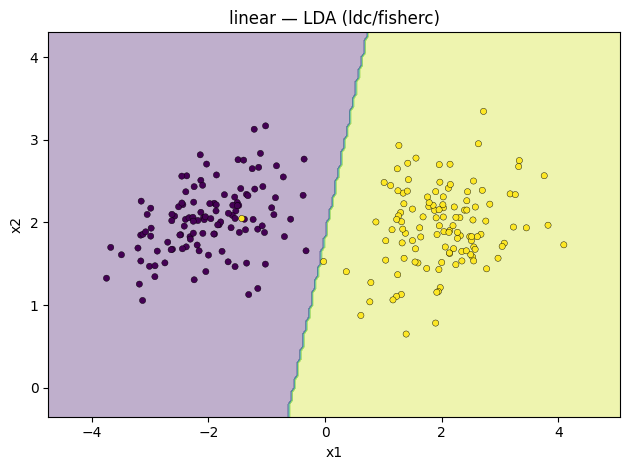

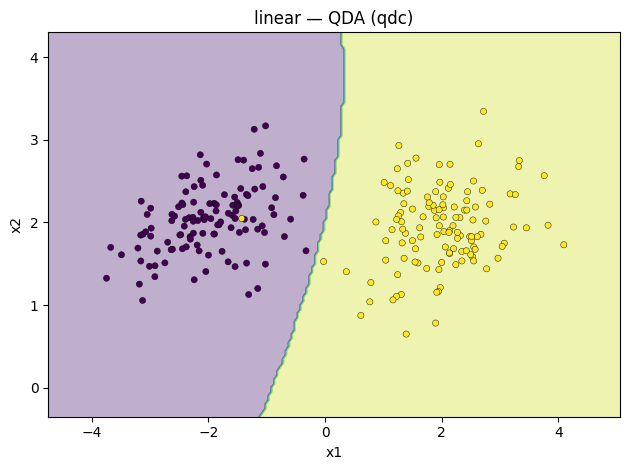

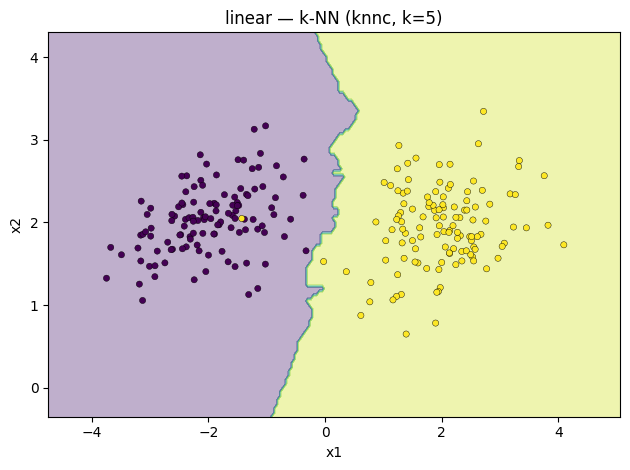

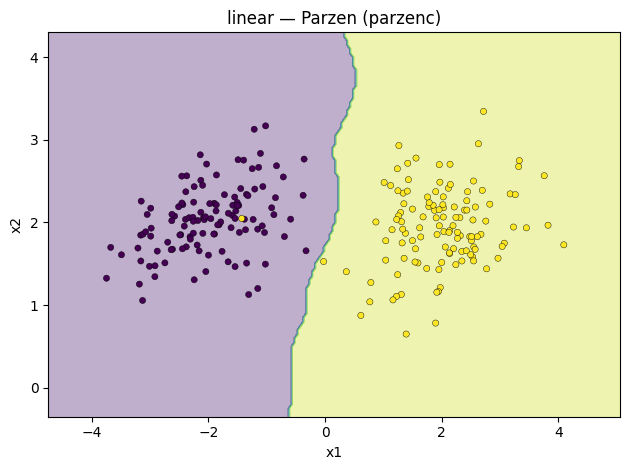

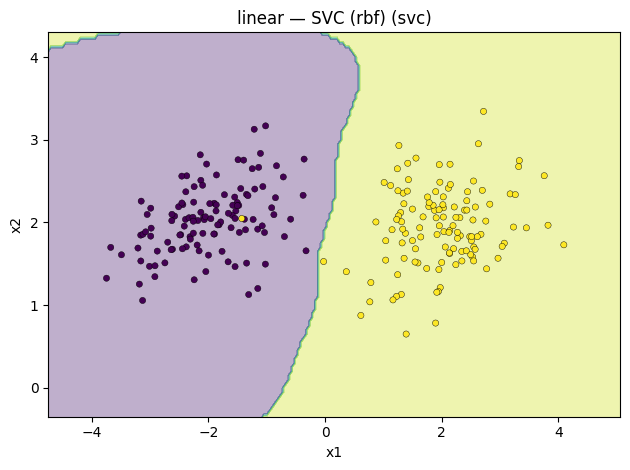

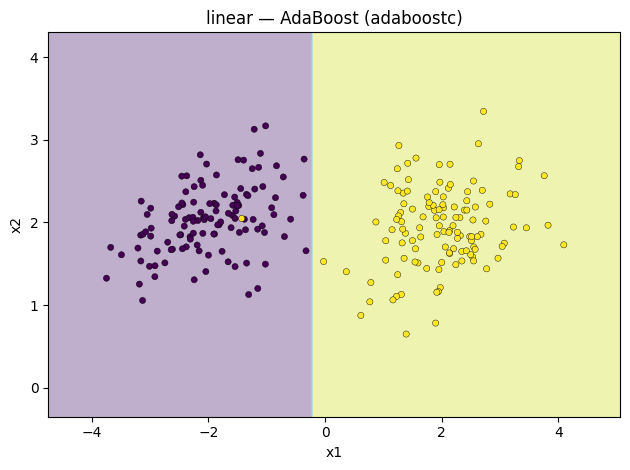

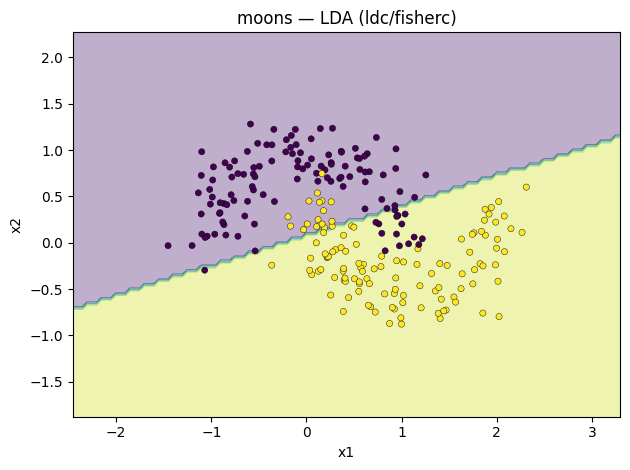

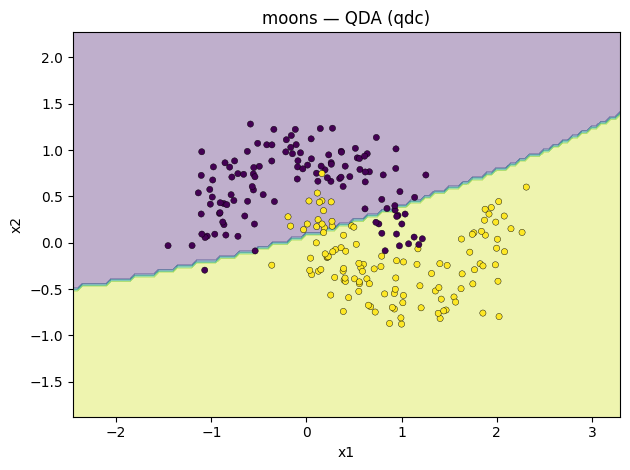

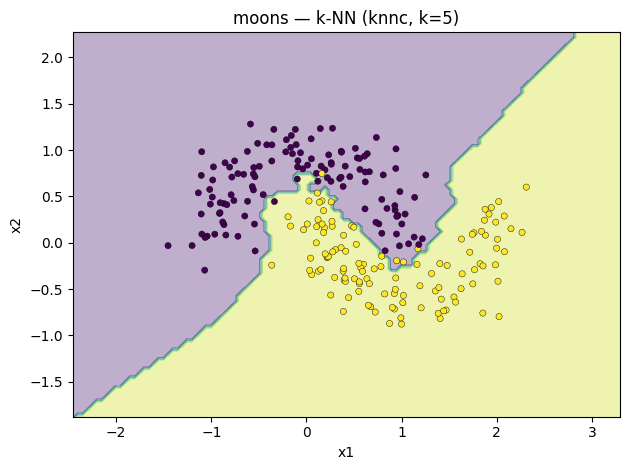

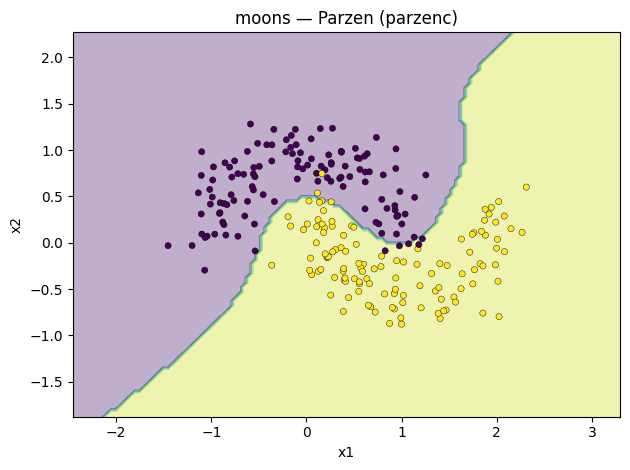

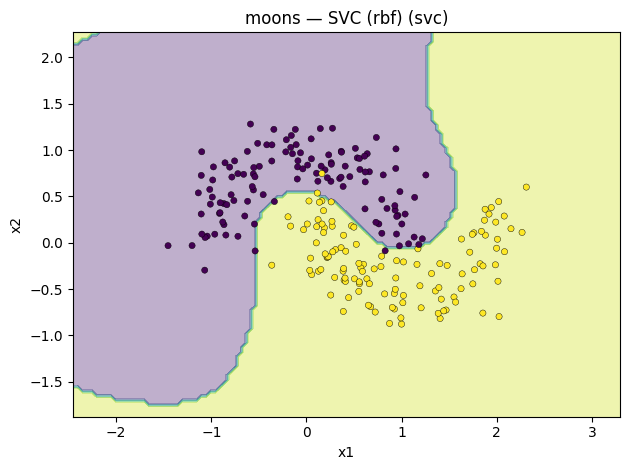

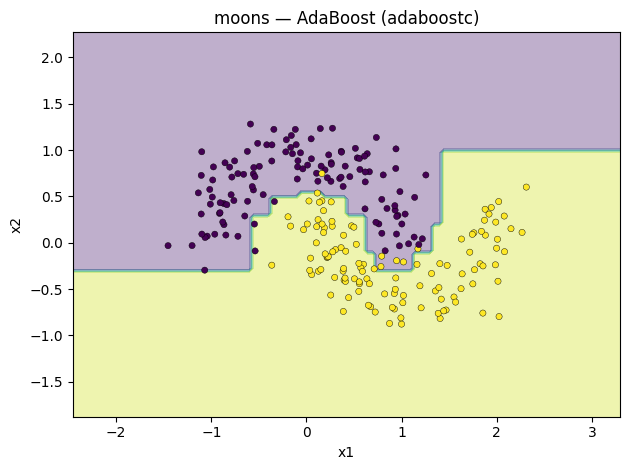

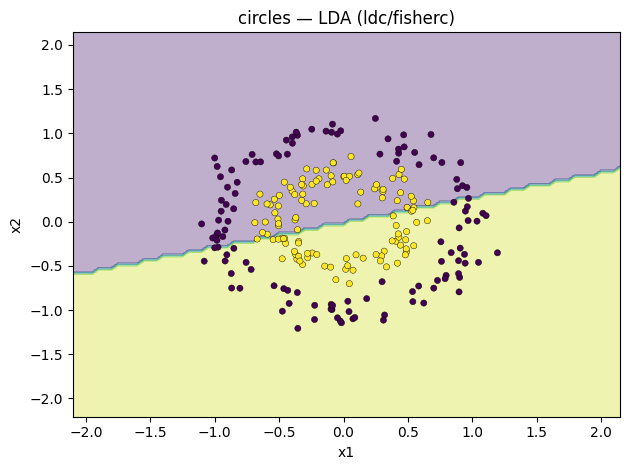

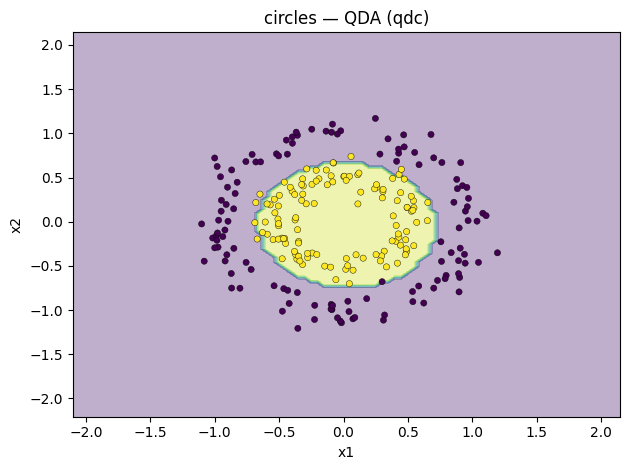

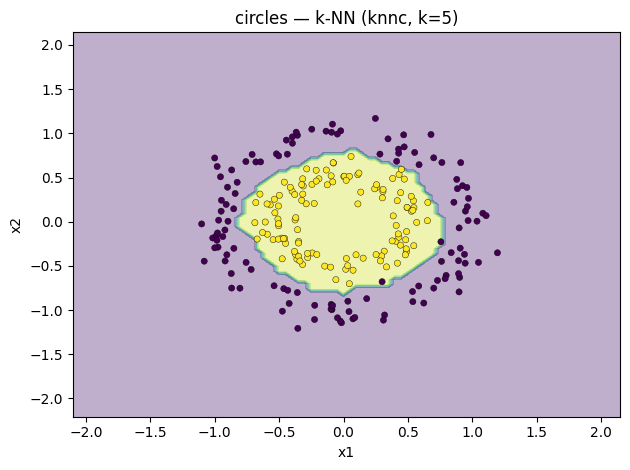

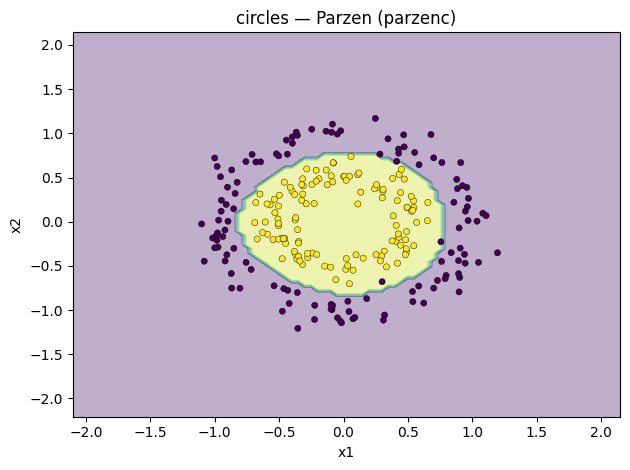

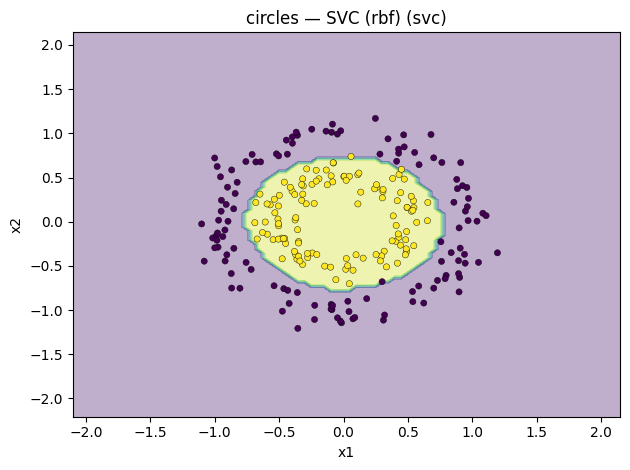

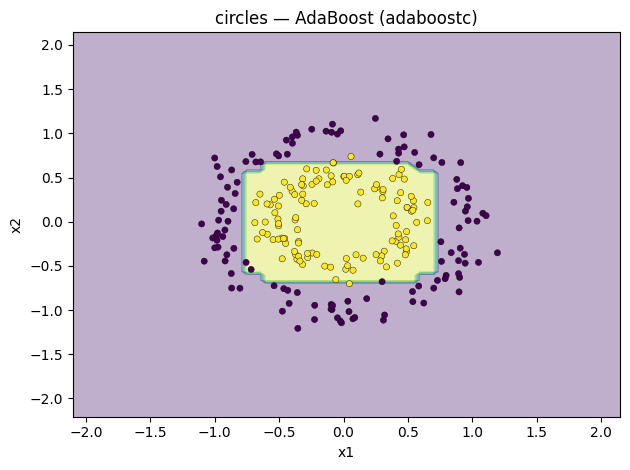

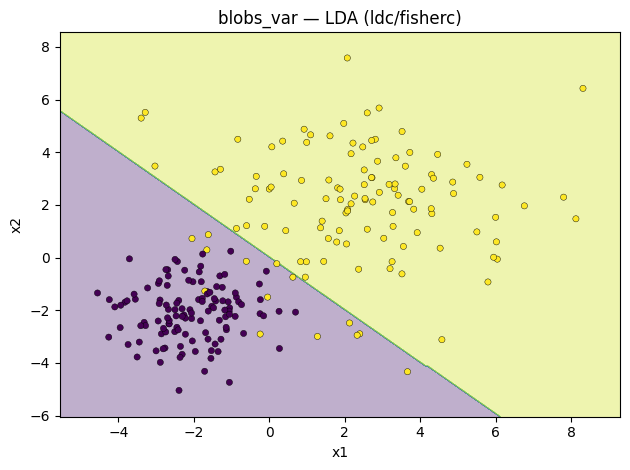

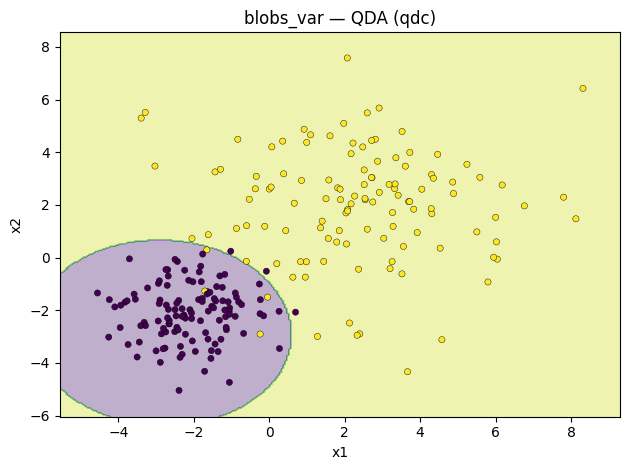

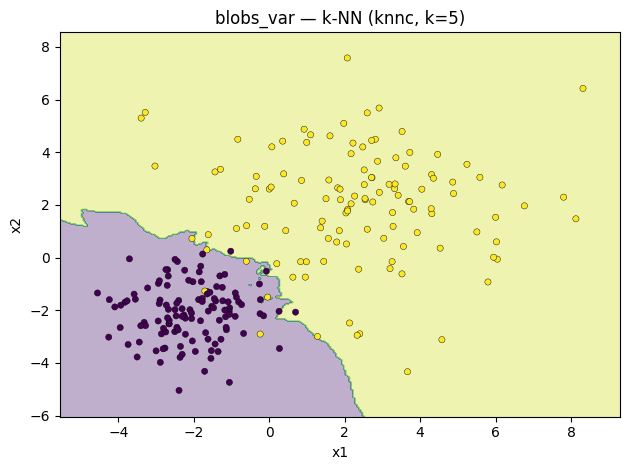

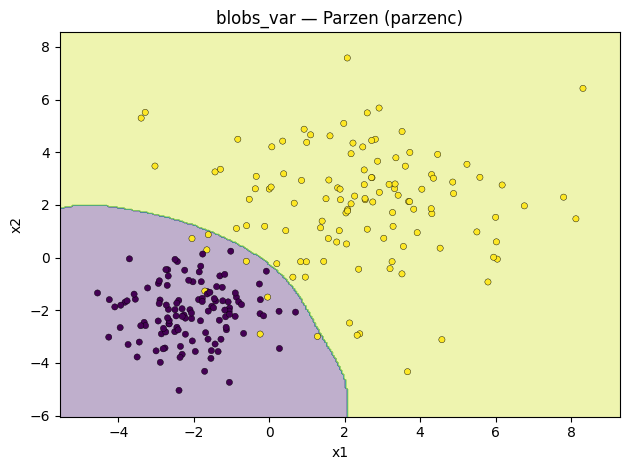

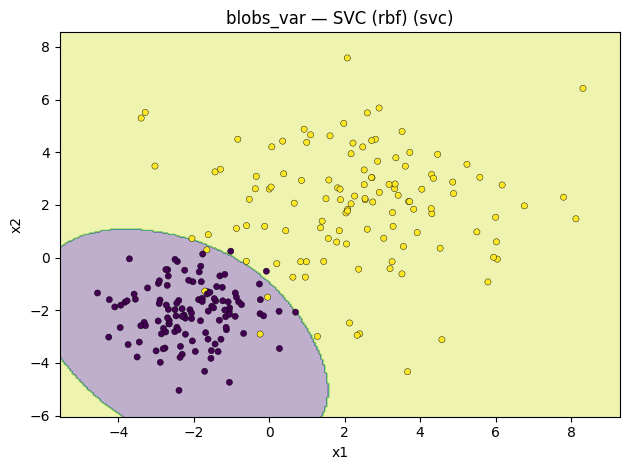

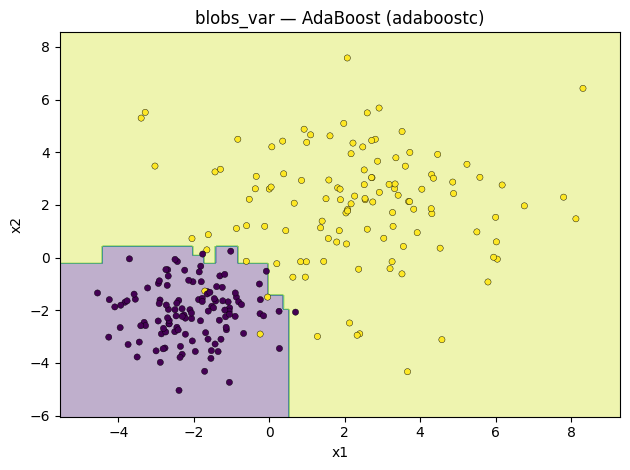

  dataset                  classifier  accuracy
blobs_var        AdaBoost (adaboostc)  0.979167
blobs_var             SVC (rbf) (svc)  0.975000
blobs_var                   QDA (qdc)  0.970833
blobs_var       Naive Bayes (naivebc)  0.970833
blobs_var Mixture of Gaussians (mogc)  0.970833
blobs_var    Decision Tree (dectreec)  0.970833
blobs_var            Parzen (parzenc)  0.966667
blobs_var            k-NN (knnc, k=5)  0.962500
blobs_var           LDA (ldc/fisherc)  0.941667
blobs_var      Nearest Centroid (nmc)  0.941667
blobs_var     Decision Stump (stumpc)  0.912500
  circles            k-NN (knnc, k=5)  0.995833
  circles            Parzen (parzenc)  0.991667
  circles             SVC (rbf) (svc)  0.987500
  circles        AdaBoost (adaboostc)  0.983333
  circles    Decision Tree (dectreec)  0.979167
  circles                   QDA (qdc)  0.954167
  circles       Naive Bayes (naivebc)  0.954167
  circles Mixture of Gaussians (mogc)  0.912500
  circles     Decision Stump (stumpc)  0

In [41]:
from sklearn.metrics import accuracy_score
import pandas as pd
datasets = make_datasets()
classifiers = get_classifiers()

rows = []
plot_subset = ["LDA (ldc/fisherc)", "QDA (qdc)", "k-NN (knnc, k=5)",
               "Parzen (parzenc)", "SVC (rbf) (svc)", "AdaBoost (adaboostc)"]

for dname, (X, y) in datasets.items():
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    for cname, clf in classifiers.items():
        clf.fit(Xtr, ytr)
        acc = accuracy_score(yte, clf.predict(Xte))
        rows.append({"dataset": dname, "classifier": cname, "accuracy": acc})
    # plot a few boundaries on the test set
    for cname in plot_subset:
        plot_decision_boundary(classifiers[cname], Xte, yte, f"{dname} — {cname}")

df = pd.DataFrame(rows).sort_values(["dataset","accuracy"], ascending=[True, False])
print(df.to_string(index=False))

## 1 - Linear Least Squares without and with Intercept (**Pen \& Paper**)

### **Exercise 1.1**

Consider standard linear regression with the squared loss as the performance measure:

$$
\sum_{i=1}^{N} (x_i^T w - y_i)^2 = \|Xw - Y\|^2
$$

The (feature) vector $x_i \in \mathbb{R}^d$ is a column vector, while all features per object in $X \in \mathbb{R}^{N \times d}$ are in rows. $Y$ is an $N$-vector with all corresponding outputs. The aim is to minimize this sum of squared residuals between the linearly predicted and actual output over $w \in \mathbb{R}^d$.

### (a)
Assume that $(X^T X)^{-1}$ exists. Show that $(X^T X)^{-1} X^T Y$ gives least squares solution to the above problem, i.e., it minimizes $\|Xw - Y\|^2$.

### (b)
Given that $(X^T X)^{-1}$ exists, what does that tell us about the data? More specifically, what limitation on the number of observations does this imply, what does invertibility say about the dimensionality of the (affine) subspace our data is in, and what difference does the presence or absence of the origin in this subspace make? To what extent are these limitations enough to guarantee invertibility?

### (c)
Let us now allow for an intercept (or bias term), i.e., we also model a constant offset in the regression function. We do this by the trick of adding a column of ones to the matrix $X$. Let $Z$ refer to this new matrix. Consider standard linear regression (with intercept) with the squared loss as the performance measure, $\|Zw - Y\|^2$, which we want to minimize for $w$.

Assuming that $(Z^T Z)^{-1}$ exists, show that $(Z^T Z)^{-1} Z^T Y$ gives a least squares solution to this least squares problem. Given that $(Z^T Z)^{-1}$ exists, what does that tell us about how the data is scattered?



### **Exercise 1.2**

Consider a regression training data set with four 1D inputs $X = (-2, -1, 0, 3)^T$ and corresponding outputs $Y = (1, 1, 2, 3)^T$


#### (a)
Let us assume that we fit a linear function without intercept to this data under squared loss. Calculate the optimal function fit for the given data set

#### (b)
Let us now also include an intercept. Still, we stick to fitting linear functions that we fit using the squared loss. Calculate the optimal value that we find for the intercept.

#### (c)
Think of polynomial regression, what is the minimum polynomial degree that we need in order to fit the regression curve exactly to the training data? Is there a difference between the situation with and without intercept?



## 2 - Polynomial Regression and Other Feature Transformations (**Coding**)

### **Exercise 2.1**

Consider the following regression problem from 2D to 1D. The input vectors $\mathbf{x}$ are from a standard normal distribution in 2D. The corresponding outputs, $y$, are obtained through the following equation: $y = 50 \sin(x_1) \sin(x_2) + \epsilon$, where $\epsilon$ has a standard normal distribution as well (but in 1D of course).


#### (a)
Visualize 10,000 samples from this regression problem and have a look at the data from different points of view.

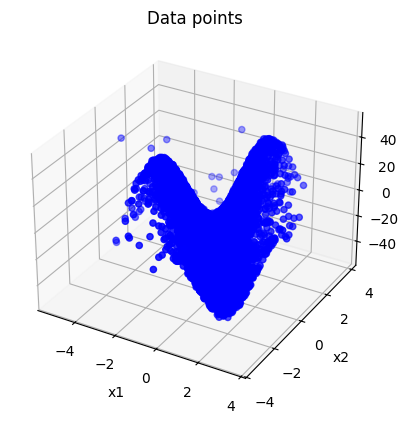

In [13]:
# WRITE YOUR OWN CODE HERE

# POSSIBLE SOLUTION

X = np.random.randn(10000, 2)
y = 50 * np.sin(X[:, 0]) * np.sin(X[:, 1]) + np.random.randn(10000)

# Visualize the data with a 3d plot, with x1 and x2 as input and y as output

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title('Data points')
plt.show()


#### (b)
Fit a linear regression to these 10,000 points and measure the error on a separate test set. Also visualize the prediction on either the training set or the test set, and check how close it is to the true distribution.

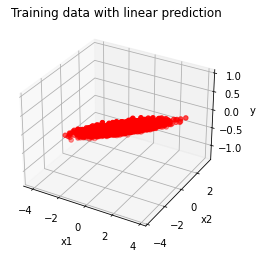

Mean squared error on the training set: 467.8571092383163
Mean squared error on the test set: 456.2639854158876


In [ ]:
from sklearn.linear_model import LinearRegression

# WRITE YOUR OWN CODE HERE

# POSSIBLE SOLUTION

# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a linear regression model on the training set

reg = LinearRegression()
reg.fit(X_train, y_train)

# Evaluate the model on the training set

y_pred = reg.predict(X_train)

# Visualize the data with a 3d plot, with x1 and x2 as input and y as output

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_pred, c='r', marker='o')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title('Training data with linear prediction')
plt.show()

# Calculate the mean squared error

mse = np.mean((y_pred - y_train) ** 2)
print('Mean squared error on the training set:', mse)

# Evaluate the model on the test set

y_pred = reg.predict(X_test)

# Calculate the mean squared error

mse = np.mean((y_pred - y_test) ** 2)

print('Mean squared error on the test set:', mse)


#### (c)
Fit a second-degree linear regression to these 10,000 points. Again, measure the error on a separate test set. Try the same for some higher degrees. It would be nice to visualize these predictions and compare their distribution with the one of the labels and of the linear prediction, while increasing the degree of the polynomial.

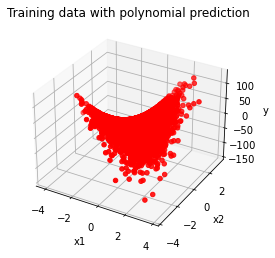

Mean squared error on the training set: 124.05290607579973
Mean squared error on the test set: 150.85801958241018


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# WRITE YOUR OWN CODE HERE

# POSSIBLE SOLUTION

poly = PolynomialFeatures(degree=2) # Try different values for the degree
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

reg = LinearRegression()
reg.fit(X_train_poly, y_train)

# Evaluate the model on the training set

y_pred = reg.predict(X_train_poly)

# Visualize the data with a 3d plot, with x1 and x2 as input and y as output

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_pred, c='r', marker='o')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title('Training data with polynomial prediction')
plt.show()

# Calculate the mean squared error

mse = np.mean((y_pred - y_train) ** 2)

print('Mean squared error on the training set:', mse)

# Evaluate the model on the test set

y_pred = reg.predict(X_test_poly)

# Calculate the mean squared error

mse = np.mean((y_pred - y_test) ** 2)

print('Mean squared error on the test set:', mse)


#### (d)
A degree of 2 (or more) can improve the performance, but if you increase it too much (e.g. 20), the error on the test set will dramatically increase. Can you figure out what seems to be happening? (If not, maybe the next question helps.)

#### (e)
Let the input $\mathbf{x}$ be as in the above, but now take $y = x_1 x_2$. Fit linear regressions of degree 1 and 2 and report the error they make and visualize the solutions in comparison with the actual training data. What do you observe?

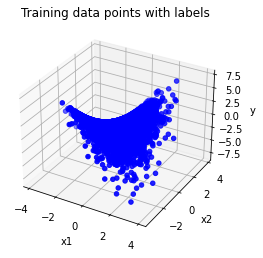

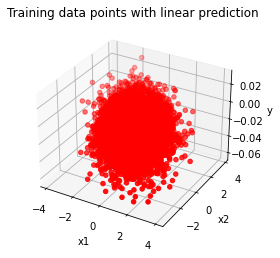

Mean squared error on the training set, linear regression: 0.9900986487510864
Mean squared error on the test set, linear regression: 1.0041558367342636



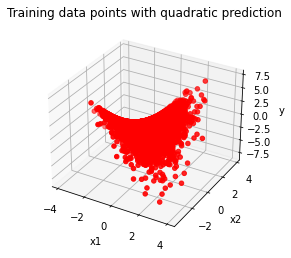

Mean squared error on the training set, quadratic regression: 1.7853389975056973e-30
Mean squared error on the test set, quadratic regression: 1.802429061451865e-30


In [ ]:
# WRITE YOUR OWN CODE HERE

# POSSIBLE SOLUTION

X = np.random.randn(10000, 2)
y = X[:, 0] * X[:, 1]


# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Visualize the training data with a 3d plot, with x1 and x2 as input and y as output

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='b', marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title('Training data points with labels')
plt.show()


# Train a linear regression model on the training set

reg = LinearRegression()
reg.fit(X_train, y_train)

# Evaluate the model on the training set

y_pred = reg.predict(X_train)

# Visualize the training data with a 3d plot, with x1 and x2 as input and the prediction as output

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_pred, c='r', marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title('Training data points with linear prediction')
plt.show()

# Calculate the mean squared error

mse = np.mean((y_pred - y_train) ** 2)

print('Mean squared error on the training set, linear regression:', mse)

# Evaluate the model on the test set

y_pred = reg.predict(X_test)

# Calculate the mean squared error

mse = np.mean((y_pred - y_test) ** 2)

print('Mean squared error on the test set, linear regression:', mse)

print()

# Train a polynomial regression model on the training set

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

reg = LinearRegression()
reg.fit(X_train_poly, y_train)

# Evaluate the model on the training set

y_pred = reg.predict(X_train_poly)

# Visualize the training data with a 3d plot, with x1 and x2 as input and the prediction as output

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_pred, c='r', marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title('Training data points with quadratic prediction')
plt.show()

# Calculate the mean squared error

mse = np.mean((y_pred - y_train) ** 2)

print('Mean squared error on the training set, quadratic regression:', mse)

# Evaluate the model on the test set

y_pred = reg.predict(X_test_poly)

# Calculate the mean squared error

mse = np.mean((y_pred - y_test) ** 2)

print('Mean squared error on the test set, quadratic regression:', mse)


# The plots show how the quadratic model fits the correct distribution of the labels, which is quadratic this time


## 3 - The Perceptron (**Coding**)

#### (a)

Generate a simple, linearly separable dataset of 4 classes. Make a scatterplot and check that the dataset is linearly separable. If it is not, generate a new dataset until it is.

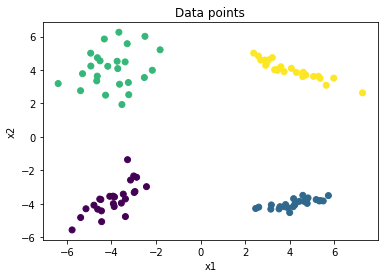

In [ ]:
#Generate a linearly separable dataset (for instance, you can use make_classification and change the random state until it is)

#HINT: use the class_sep parameter and set it equal to the number of classes to increase the separation between them

#WRITE YOUR OWN CODE HERE

#POSSIBLE SOLUTION

X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=4, class_sep = 4)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data points')
plt.show()


#### (b)
Train a perceptron on this dataset. Plot the decision boundary and the data points.

Accuracy on the training set: 1.0


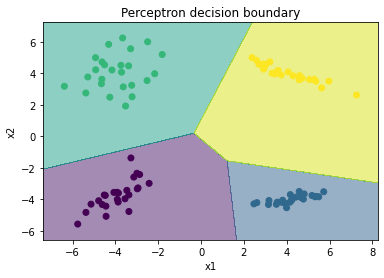

In [ ]:
from sklearn.linear_model import Perceptron

# WRITE YOUR OWN CODE HERE

# POSSIBLE SOLUTION

# Train a perceptron on the dataset
clf = Perceptron(fit_intercept= True)
clf.fit(X, y)

# Evaluate the classifier on the training set

y_pred = clf.predict(X)

# Let's calculate the accuracy of the classifier

accuracy = np.mean(y_pred == y)
print('Accuracy on the training set:', accuracy)

# Plot the decision boundary

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.5, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron decision boundary')
plt.show()


#### (c)
What happens when the classes in the dataset are not linearly separable? Regenerate the dataset (this time, not linearly separable) and train the perceptron again. What do you observe?

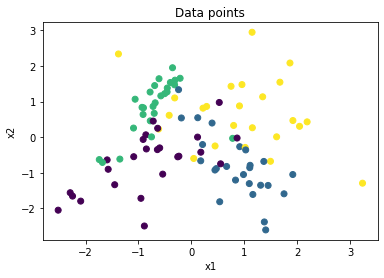

In [ ]:
# Regenerate the data ...

#WRITE YOUR OWN CODE HERE

#POSSIBLE SOLUTION

X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes = 4, class_sep=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data points')
plt.show()

Accuracy on the training set: 0.6


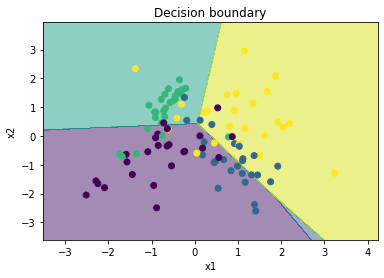

In [ ]:
# ... and train again

# WRITE YOUR OWN CODE HERE

# POSSIBLE SOLUTION

clf = Perceptron()
clf.fit(X, y)

y_pred = clf.predict(X)

accuracy = np.mean(y_pred == y)
print('Accuracy on the training set:', accuracy)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.5, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision boundary')
plt.show()

# As we can see, the decision boundary cannot separate the data, as the perceptron is a linear classifier and the data is not linearly separable.